#Transfer Learning 

ILSVRC: ετήσιος διαγωνισμός που χρησιμοποιεί υποσύνολα από το σύνολο δεδομένων ImageNet για ανάπτυξη και συγκριτική αξιολόγηση αλγορίθμων τελευταίας τεχνολογίας.


ΙmageNet: πολύ μεγάλη συλλογή χαρακτηρισμένων (Amazon Mechanical Turk Worker) φωτογραφιών για την ανάπτυξη αλγορίθμων όρασης υπολογιστή.


Οι εργασίες του ILSVRC οδήγησαν σε σημαντικές αρχιτεκτονικές μοντέλων και τεχνικές  σύνδεσης της όρασης  υπολογιστή και της βαθιάς μάθησης




![alt text](https://media.springernature.com/original/springer-static/image/chp%3A10.1007%2F978-3-030-01424-7_27/MediaObjects/474269_1_En_27_Fig1_HTML.gif)

![alt text](https://miro.medium.com/max/1920/1*qfQ3hmHLwApXZBN-A85r8g.png)


![alt text](https://drive.google.com/uc?id=1iaDJEEAzfEUt_qaE6uu4Uus6oNKfId8A)
![alt text](https://drive.google.com/uc?id=1IWPZ3pUXrm1h04ZHhgekujfyxcqYx7cQ)

# Transfer learning με το TensorFlow Hub



Το TensorFlow Hub είναι ένας τρόπος κοινής χρήσης προκατασκευασμένων μοντέλων βαθιάς μάθησης (στο [TensorFlow Module Hub](https://tfhub.dev/) για μια λίστα με προεκπαιδευμένα μοντέλα με δυνατότητα αναζήτησης) 

[ Copyright 2018 The TensorFlow Authors.](https://www.tensorflow.org/tutorials/images/transfer_learning_with_hub).

In [ ]:
import matplotlib.pylab as plt
import tensorflow as tf

In [ ]:
!pip install -U tf-hub-nightly
!pip install tfds-nightly
import tensorflow_hub as hub

from tensorflow.keras import layers

     |████████████████████████████████| 109 kB 4.3 MB/s 
     |████████████████████████████████| 4.3 MB 4.5 MB/s 
     |████████████████████████████████| 87 kB 5.9 MB/s 


## ImageNet classifier

### Κατεβάστε τον classifier

Χρησιμοποιήστε το `hub.module` για να φορτώσετε το  [mobilenet](https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2), και το `tf.keras.layers.Lambda` για να ενσωματώσετετ ως keras layer. Μπορείτε να χρησιμοποιήσετε κάθε [TensorFlow 2 compatible image classifier URL](https://tfhub.dev/s?q=tf2&module-type=image-classification) από το tfhub.dev.

In [1]:
classifier_url ="https://tfhub.dev/google/tf2-preview/mobilenet_v2/classification/2" #@param {type:"string"}

In [ ]:
IMAGE_SHAPE = (224, 224)

classifier = tf.keras.Sequential([
    hub.KerasLayer(classifier_url, input_shape=IMAGE_SHAPE+(3,))
])

Η έξοδος είναι μια παρτίδα  logits διανυσμάτων. 
Οι τιμές στα logits είναι οι κλάσεις num_classes = 1001 της ταξινόμησης από την αρχική εκπαίδευση. 

Η αντιστοίχιση από τις τιμές σε ετικέτες κλάσης βρίσκεται στο αρχείο download.tensorflow.org/data/ImageNetLabels.txt (με κλάση 0 για "φόντο", ακολουθούμενη από 1000 πραγματικές κλάσεις ImageNet). 

Οι εικόνες εισόδου αναμένεται να έχουν τιμές χρώματος στο εύρος [0,1], ακολουθώντας τις κοινές συμβάσεις εισαγωγής εικόνας. 

Για αυτό το μοντέλο, το μέγεθος των εικόνων εισόδου καθορίζεται σε ύψος x πλάτος = 224 x 224 εικονοστοιχεία.

### Δοκιμή του μοντέλου σε μία εικόνα

Κάντε λήψη μίας εικόνας για να δοκιμάσετε το μοντέλο.

73728/61306 [====================================] - 0s 0us/step


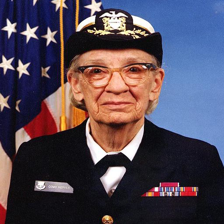

In [ ]:
import numpy as np
import PIL.Image as Image

grace_hopper = tf.keras.utils.get_file('image.jpg','https://storage.googleapis.com/download.tensorflow.org/example_images/grace_hopper.jpg')
grace_hopper = Image.open(grace_hopper).resize(IMAGE_SHAPE)
grace_hopper

In [ ]:
grace_hopper = np.array(grace_hopper)/255.0
grace_hopper.shape

(224, 224, 3)

Προσθέστε τον πίνακα της εικόνας στην παρτίδα διανυσμάτων (batch) και περάστε το ως είσοδο στο προεκπαιδευμένο μοντέλο. 

In [ ]:
result = classifier.predict(grace_hopper[np.newaxis, ...])
result.shape

(1, 1001)

Το αποτέλεσμα είναι ένα διάνυσμα μήκους 1x1001 με τις πιθανότητες να ανήκει σε κάθε κλάση η εικόνα (με κλάση 0 για "φόντο", ακολουθούμενη από 1000 πραγματικές κλάσεις ImageNet). Η κλάση με την μεγαλύτερη πιθανότητα υπολογίζεται με το  argmax και είναι η κλάση που ανήκει η εικόνα.



In [ ]:
predicted_class = np.argmax(result[0], axis=-1)
predicted_class

653

### Αποκωδικοποιήστε τις προβλέψεις 

Έχουμε την πρόβλεψη του μοντέλου σχετικά με το ID της κλάσης που ανήκει.
Θα ανακτήσουμε της ετικέτες του ImageNet και θα αποκωδικοποιήσουμε τις προβλέψεις.

In [ ]:
labels_path = tf.keras.utils.get_file('ImageNetLabels.txt','https://storage.googleapis.com/download.tensorflow.org/data/ImageNetLabels.txt')
imagenet_labels = np.array(open(labels_path).read().splitlines())

24576/10484 [======================================================================] - 0s 0us/step


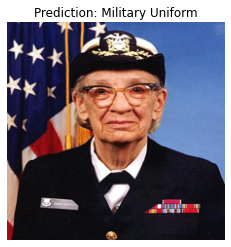

In [ ]:
plt.imshow(grace_hopper)
plt.axis('off')
predicted_class_name = imagenet_labels[predicted_class]
_ = plt.title("Prediction: " + predicted_class_name.title())

## Απλό transfer learning

Χρησιμοποιώντας το TF Hub είναι απλό να επανεκπαιδεύσουμε το ανώτερο επίπεδο του μοντέλου για να αναγνωρίσουμε τις κλάσεις στο σύνολο δεδομένων μας.

### Dataset

 Για αυτό το παράδειγμα, θα χρησιμοποιήσουμε το TensorFlow flowers dataset:

In [ ]:
data_root = tf.keras.utils.get_file(
  'flower_photos','https://storage.googleapis.com/download.tensorflow.org/example_images/flower_photos.tgz',
   untar=True)

228827136/228813984 [==============================] - 10s 0us/step


Ο απλούστερος τρόπος για να φορτώσουμε τα δεδομένα στο μοντέλο μας είναι να χρησιμοποιήσουμε το  `tf.keras.preprocessing.image.ImageDataGenerator`
Δείτε αναλυτικά [εδώ](https://keras.io/api/preprocessing/image/).

Όλα τα TensorFlow Hub's image modules δέχονται ως είσοδο float στο διάστημα `[0, 1]` το οποίο το πετυχαίνουμε με την ενεργοποίηση της παραμέτρου `ImageDataGenerator`'s `rescale`. Έπειτα ορίζουμε το μέγεθος που θα έχουν οι εικόνες στην είσοδο. H default τιμή για το batch size είναι 32

In [ ]:
image_generator = tf.keras.preprocessing.image.ImageDataGenerator(rescale=1/255)
image_data = image_generator.flow_from_directory(str(data_root), target_size=IMAGE_SHAPE)

Found 3670 images belonging to 5 classes.


Το `image_data` επιστρέφει το ζεύγος `image_batch, label_batch`.

In [ ]:
for image_batch, label_batch in image_data:
  print("Image batch shape: ", image_batch.shape)
  print("Label batch shape: ", label_batch.shape)
  break

Image batch shape:  (32, 224, 224, 3)
Label batch shape:  (32, 5)


### Εκτέλεση του classifier στο batch των εικόνων

In [ ]:
result_batch = classifier.predict(image_batch)
result_batch.shape

(32, 1001)

In [ ]:
predicted_class_names = imagenet_labels[np.argmax(result_batch, axis=-1)]
predicted_class_names

array(['daisy', 'hummingbird', 'buckeye', 'artichoke', 'picket fence',
       'daisy', 'daisy', 'bee', 'daisy', 'daisy', 'daisy', 'picket fence',
       'picket fence', 'daisy', 'daisy', 'daisy', 'daisy', 'daisy',
       'knot', 'mushroom', 'cloak', 'bee', 'sea urchin', 'barn spider',
       'picket fence', 'ear', 'Bedlington terrier', 'cardoon', 'vase',
       'tractor', 'bonnet', 'daisy'], dtype='<U30')

Θα ελέγξουμε πώς ευθυγραμμίζονται με τις εικόνες οι προβλέψεις του μοντέλου

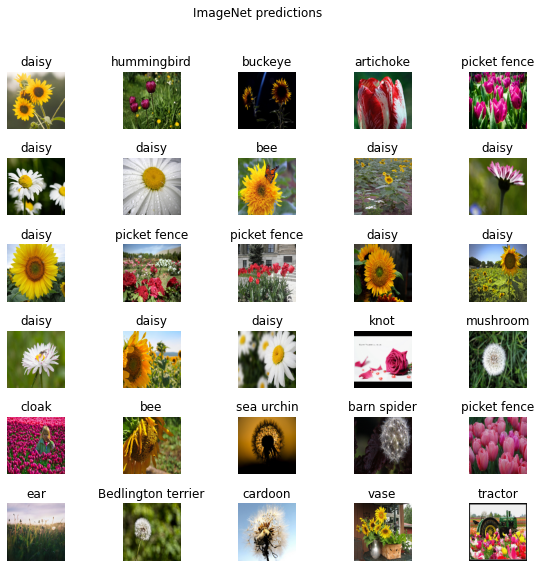

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  plt.title(predicted_class_names[n])
  plt.axis('off')
_ = plt.suptitle("ImageNet predictions")

Τα αποτελέσματα δεν είναι καθόλου ικανοποιητικά, αλλά είναι λογικό, δεδομένου ότι αυτά δεν ανήκουν σε κλάσεις για τα οποία εκπαιδεύτηκε το μοντέλο (εκτός από το "daisy").

### Κατέβασμα του headless μοντέλου

Το TensorFlow Hub διανέμει επίσης μοντέλα χωρίς το ανώτερο επίπεδο ταξινόμησης. Αυτά μπορούν να χρησιμοποιηθούν για την εύκολη μεταφορά μάθησης. Οποιοδήποτε  [Tensorflow 2 compatible image feature vector URL](https://tfhub.dev/s?module-type=image-feature-vector&q=tf2) from tfhub.dev μπορεί να λειτουργήσει ως headless μοντέλο.

In [ ]:
feature_extractor_url = "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/2" #@param {type:"string"}

Δημιουργία του feature extractor.

In [ ]:
feature_extractor_layer = hub.KerasLayer(feature_extractor_url,
                                         input_shape=(224,224,3))

Επιστρέφει ένα διάνυσμα μήκου 1x1280 για κάθε εικόνα:

In [ ]:
feature_batch = feature_extractor_layer(image_batch)
print(feature_batch.shape)

(32, 1280)


Πάγωμα των μεταβλητών στο επίπεδο εξαγωγής χαρακτηριστικών, έτσι ώστε η εκπαίδευση να τροποποιεί μόνο στο επίπεδο του νέου ταξινομητή.

In [ ]:
feature_extractor_layer.trainable = False

### Επισύναψη ενός classification head
Τώρα εισάγουμε το επίπεδο hub σε ένα μοντέλο "tf.keras.Sequential" και προσθέτουμε ένα νέο επίπεδο ταξινόμησης.

In [ ]:
model = tf.keras.Sequential([
  feature_extractor_layer,
  layers.Dense(image_data.num_classes)
])

model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 keras_layer_1 (KerasLayer)  (None, 1280)              2257984   
                                                                 
 dense (Dense)               (None, 5)                 6405      
                                                                 
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [ ]:
predictions = model(image_batch)

In [ ]:
predictions.shape

TensorShape([32, 5])

### Εκπαιδεύστε το μοντέλο 

Χρησιμοποιήστε το compile για να διαμορφώσετε τη διαδικασία εκπαίδευσης:

In [ ]:
model.compile(
  optimizer=tf.keras.optimizers.Adam(),
  loss=tf.keras.losses.CategoricalCrossentropy(from_logits=True),
  metrics=['acc'])

Τώρα χρησιμοποιούμε τη μέθοδο `.fit` για να εκπαιδεύσουμε το μοντέλο.

Χρησιμοποιούμε μόνο 2 εποχές για αυτό το παράδειγμα. Για να απεικονίσουμε την πρόοδο της εκπαίδευσης, χρησιμοποιούμε το log για το loss και το accuracy για κάθε batch αντί για τον μέσο όρο της εποχής.

In [ ]:
class CollectBatchStats(tf.keras.callbacks.Callback):
  def __init__(self):
    self.batch_losses = []
    self.batch_acc = []

  def on_train_batch_end(self, batch, logs=None):
    self.batch_losses.append(logs['loss'])
    self.batch_acc.append(logs['acc'])
    self.model.reset_metrics()

In [ ]:
steps_per_epoch = np.ceil(image_data.samples/image_data.batch_size)

batch_stats_callback = CollectBatchStats()

history = model.fit_generator(image_data, epochs=2,
                              steps_per_epoch=steps_per_epoch,
                              callbacks = [batch_stats_callback])

Epoch 1/2


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


115/115 [==============================] - 22s 157ms/step - loss: 0.3439 - acc: 0.9375
Epoch 2/2
115/115 [==============================] - 16s 141ms/step - loss: 0.3618 - acc: 0.9062


Τώρα μετά, ακόμη και με λίγες επαναλήψεις εκπαίδευσης, μπορούμε ήδη να δούμε ότι το μοντέλο σημειώνει πρόοδο στην εργασία.

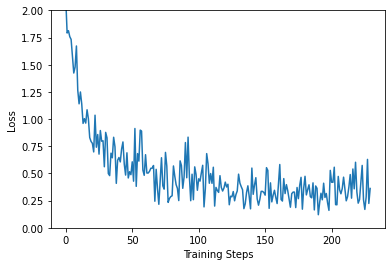

In [ ]:
plt.figure()
plt.ylabel("Loss")
plt.xlabel("Training Steps")
plt.ylim([0,2])
plt.plot(batch_stats_callback.batch_losses)

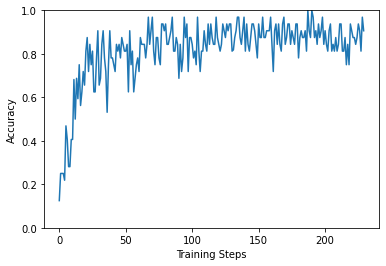

In [ ]:
plt.figure()
plt.ylabel("Accuracy")
plt.xlabel("Training Steps")
plt.ylim([0,1])
plt.plot(batch_stats_callback.batch_acc)

###Ελέγξτε τις προβλέψεις 

Λαμβάνουμε  πρώτα τη λίστα με τα ονόματα κλάσεων:

In [ ]:
class_names = sorted(image_data.class_indices.items(), key=lambda pair:pair[1])
class_names = np.array([key.title() for key, value in class_names])
class_names

array(['Daisy', 'Dandelion', 'Roses', 'Sunflowers', 'Tulips'],
      dtype='<U10')

Τρέχουμε τον κώδικα για κάθε image batch  μέσω του μοντέλου και αντιστοιχούμε τις πιθανότητες σε ονόματα τάξεων.

In [ ]:
predicted_batch = model.predict(image_batch)
predicted_id = np.argmax(predicted_batch, axis=-1)
predicted_label_batch = class_names[predicted_id]

Εμφάνιση των αποτελεσμάτων

In [ ]:
label_id = np.argmax(label_batch, axis=-1)

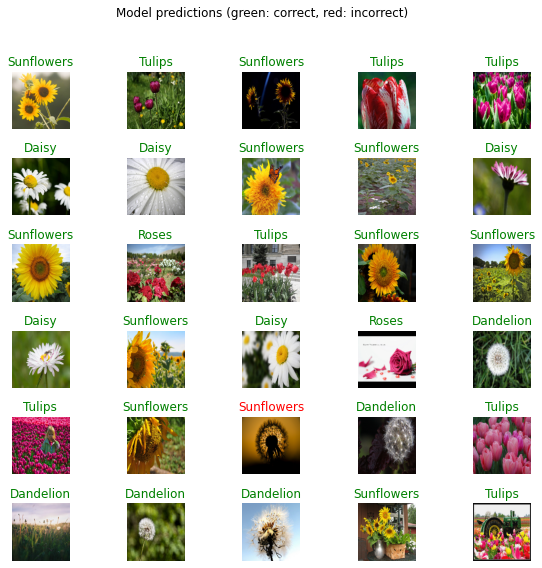

In [ ]:
plt.figure(figsize=(10,9))
plt.subplots_adjust(hspace=0.5)
for n in range(30):
  plt.subplot(6,5,n+1)
  plt.imshow(image_batch[n])
  color = "green" if predicted_id[n] == label_id[n] else "red"
  plt.title(predicted_label_batch[n].title(), color=color)
  plt.axis('off')
_ = plt.suptitle("Model predictions (green: correct, red: incorrect)")

## Εξαγωγή του μοντέλο 

Μπορούμε να αποθηκεύσουμε το εκπαιδευμένο μοντέλο μας:

In [ ]:
import time
t = time.time()

export_path = "/tmp/saved_models/{}".format(int(t))
model.save(export_path, save_format='tf')

export_path

INFO:tensorflow:Assets written to: /tmp/saved_models/1652118912/assets


INFO:tensorflow:Assets written to: /tmp/saved_models/1652118912/assets


'/tmp/saved_models/1652118912'

Θα επιβεβαιώσουμε ότι μπορούμε να ξαναφορτώσουμε το εκπαιδευμένο μοντέλο μας, και να μας δώσει τα ίδια αποτελέσματα:

In [ ]:
reloaded = tf.keras.models.load_model(export_path)

In [ ]:
result_batch = model.predict(image_batch)
reloaded_result_batch = reloaded.predict(image_batch)

In [ ]:
abs(reloaded_result_batch - result_batch).max()

0.0

Αυτό το αποθηκευμένο μοντέλο μπορεί να φορτωθεί για συμπεράσματα αργότερα ή να μετατραπεί σε [TFLite](https://www.tensorflow.org/lite/convert/) ή [TFjs](https://github.com/tensorflow/tfjs-converter).
